# Spatial Sampling Strategies

We'll focus on spatial sampling methods as applied to sample from a finite set of geospatial features.

In [1]:
# Load relevant R packages
inLibraries = list('repr','rgdal','sp','rgeos','RColorBrewer','classInt')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){           
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

Warning message:
"package 'rgdal' was built under R version 3.4.2"Warning message:
"package 'sp' was built under R version 3.4.2"Warning message:
"package 'rgeos' was built under R version 3.4.2"Warning message:
"package 'classInt' was built under R version 3.4.2"

In [3]:
# Read in MO county polygons
counties <- readOGR("datasets/mo_counties", "st_county10")

# Read in MO rail lines
railLine <- readOGR("datasets/mo_counties", "railLine")

# Read in MO public school points
publicSchool <- readOGR("datasets/mo_counties", "PublicSchoolsMO")

OGR data source with driver: ESRI Shapefile 
Source: "datasets/mo_counties", layer: "st_county10"
with 115 features
It has 46 fields
Integer64 fields read as strings:  POP90 WHITE90 BLACK90 ASIANPI90 AMIND90 OTHER90 HISP90 POP00 WHITE00 BLACK00 ASIAN00 AMIND00 HAWNPI00 OTHER00 MULTRA00 HISP00 POP10 WHITE10 BLACK10 ASIAN10 AMIND10 HAWNPI10 OTHER10 MULTRA10 HISP10 
OGR data source with driver: ESRI Shapefile 
Source: "datasets/mo_counties", layer: "railLine"
with 4272 features
It has 4 fields
OGR data source with driver: ESRI Shapefile 
Source: "datasets/mo_counties", layer: "PublicSchoolsMO"
with 2343 features
It has 23 fields


In [4]:
# Summarize attributes of county polygons
summary(counties)

Object of class SpatialPolygonsDataFrame
Coordinates:
        min     max
x  265131.4  847373
y 3986649.6 4496645
Is projected: TRUE 
proj4string :
[+proj=utm +zone=15 +datum=NAD83 +units=m +no_defs +ellps=GRS80
+towgs84=0,0,0]
Data attributes:
 STATEFP10   COUNTYFP10     COUNTYNS10     GEOID10          NAME10   
 29:115    001    :  1   00758456:  1   29001  :  1   St. Louis:  2  
           003    :  1   00758457:  1   29003  :  1   Adair    :  1  
           005    :  1   00758458:  1   29005  :  1   Andrew   :  1  
           007    :  1   00758459:  1   29007  :  1   Atchison :  1  
           009    :  1   00758460:  1   29009  :  1   Audrain  :  1  
           011    :  1   00758461:  1   29011  :  1   Barry    :  1  
           (Other):109   (Other) :109   (Other):109   (Other)  :108  
           NAMELSAD10  LSAD10   CLASSFP10  MTFCC10    CSAFP10      CBSAFP10 
 Adair County   :  1   06:114   C7:  1    G4020:115   164 : 3   28140  : 9  
 Andrew County  :  1   25:  1   H1:114   

In [5]:
# Summarize attributes of railway line features
summary(railLine)

Object of class SpatialLinesDataFrame
Coordinates:
        min       max
x  275117.6  837056.7
y 3988017.9 4496014.7
Is projected: TRUE 
proj4string :
[+proj=utm +zone=15 +datum=NAD83 +units=m +no_defs +ellps=GRS80
+towgs84=0,0,0]
Data attributes:
          LINEARID                               FULLNAME      MTFCC     
 1101052686927:   1   Missouri Pacific RR            : 485   R1011:4257  
 1101052686928:   1   St Louis-San Francisco Rlwy    : 340   R1051:  15  
 1101052686929:   1   Norfolk Southern RR            : 335               
 1101052686930:   1   Burlington Northern Santa Fe RR: 284               
 1101052686931:   1   Burlington Northern RR         : 198               
 1101052686932:   1   (Other)                        :1515               
 (Other)      :4266   NA's                           :1115               
     length        
 Min.   :    0.69  
 1st Qu.:  185.40  
 Median :  530.93  
 Mean   : 2209.60  
 3rd Qu.: 1758.99  
 Max.   :57773.00  
                   

In [6]:
# Summarize attributes of public school point features
summary(publicSchool)

Object of class SpatialPointsDataFrame
Coordinates:
                min       max
coords.x1  286343.7  826422.2
coords.x2 3992133.4 4490536.0
Is projected: TRUE 
proj4string :
[+proj=utm +zone=15 +datum=NAD83 +units=m +no_defs +ellps=GRS80
+towgs84=0,0,0]
Number of points: 2343
Data attributes:
    CtyDist         SchNum            SchID                        Facility   
 115115 :  76   4020   :451   024090-3090:   2   Central Elem.         :  10  
 039141 :  55   1050   :445   049148-1050:   2   Early Childhood Center:   8  
 201201 :  35   3000   :197   078005-4020:   2   Mark Twain Elem.      :   8  
 048078 :  33   4040   :131   115906-6932:   2   South Elem.           :   7  
 096088 :  33   4060   : 84   001090-1050:   1   Central High          :   6  
 024093 :  32   4080   : 55   001090-4020:   1   Jefferson Elem.       :   6  
 (Other):2079   (Other):980   (Other)    :2333   (Other)               :2298  
              Address                                    Address2   
 21

In [7]:
peek_counties <- head(counties@data, 3)

t(peek_counties)

,0,1,2
STATEFP10,29,29,29
COUNTYFP10,045,005,199
COUNTYNS10,00758477,00758457,00758552
GEOID10,29045,29005,29199
NAME10,Clark,Atchison,Scotland
NAMELSAD10,Clark County,Atchison County,Scotland County
LSAD10,06,06,06
CLASSFP10,H1,H1,H1
MTFCC10,G4020,G4020,G4020
CSAFP10,NA,NA,NA


In [8]:
peek_railLine <- head(railLine@data, 3)

t(peek_railLine)

,0,1,2
LINEARID,11051005878,11051005879,11051005880
FULLNAME,at and Sf Rlwy,at and Sf Rlwy,at and Sf Rlwy
MTFCC,R1011,R1011,R1011
length,679.924,426.020,3208.210


In [9]:
peek_publicSchool <- head(publicSchool@data, 3)

t(peek_publicSchool)

,1,2,3
CtyDist,001090,001090,001091
SchNum,1050,4020,1050
SchID,001090-1050,001090-4020,001091-1050
Facility,Adair Co. High,Adair Co. Elem.,Kirksville Sr. High
Address,600 Rombauer Ave,600 Rombauer Ave,1300 S Cottage Grove
Address2,NA,NA,NA
City,Novinger,Novinger,Kirksville
State,MO,MO,MO
ZIP,635592477,635592477,635013910
County,Adair,Adair,Adair


## Visualize the Spatial Features

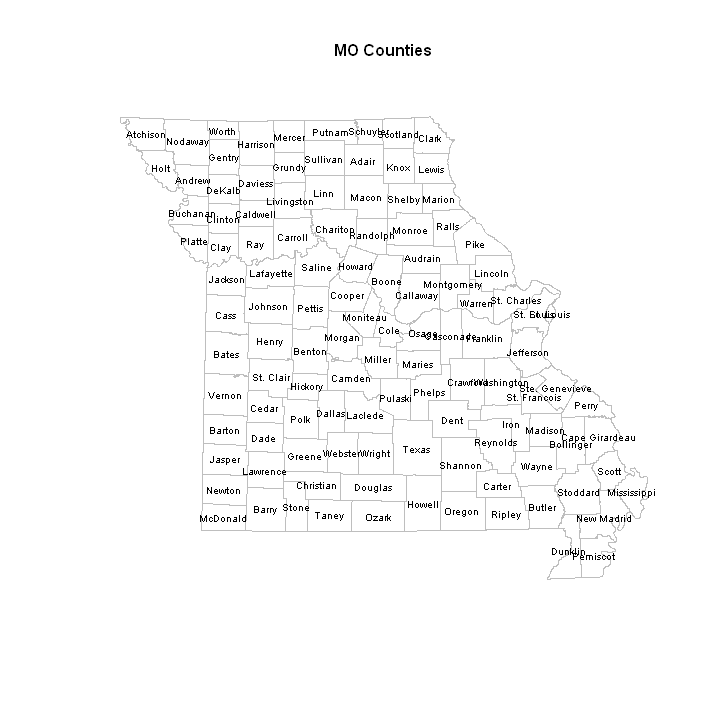

In [10]:
# Map county data
plot(counties, col = "white", border = "gray", 
         main = "MO Counties", cex.main = 0.8)

# Get centroid of polygons
centroids <- gCentroid(counties, byid = TRUE)
centroidLons <- coordinates(centroids)[,1]
centroidLats <- coordinates(centroids)[,2]

#label with county name
text(centroidLons, centroidLats, labels=counties$NAME10,cex=0.5)

### Visualize the Rail Lines

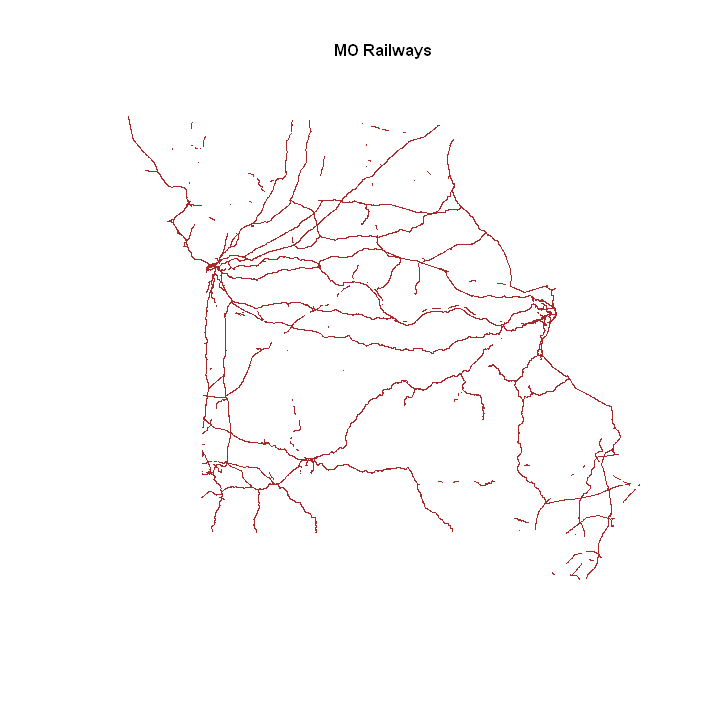

In [11]:
# Map rail line features
plot(railLine, col = "brown", 
         main = "MO Railways", cex.main = 0.8)

### Visualize the Public Schools

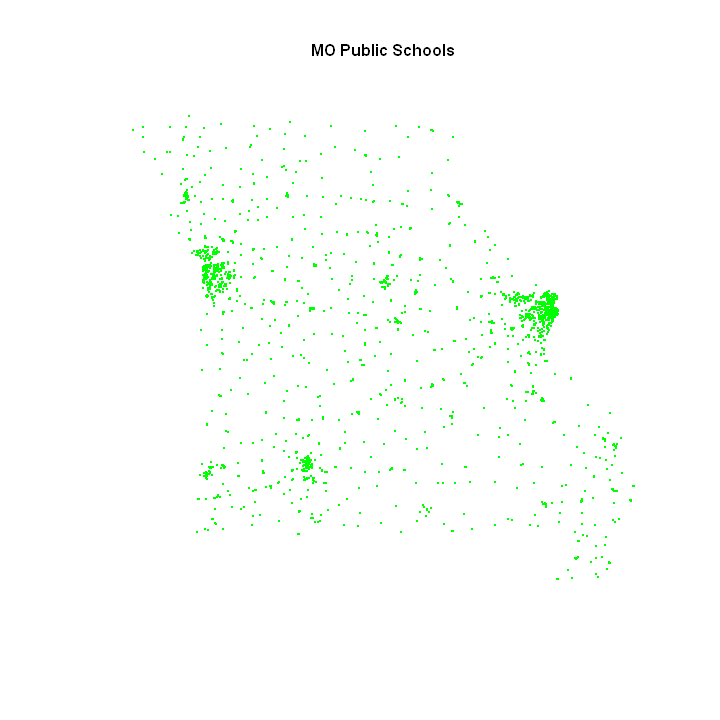

In [12]:
# Map school point features
plot(publicSchool, pch=20, col = "green",
             cex = 0.2, main = "MO Public Schools", cex.main = 0.8)

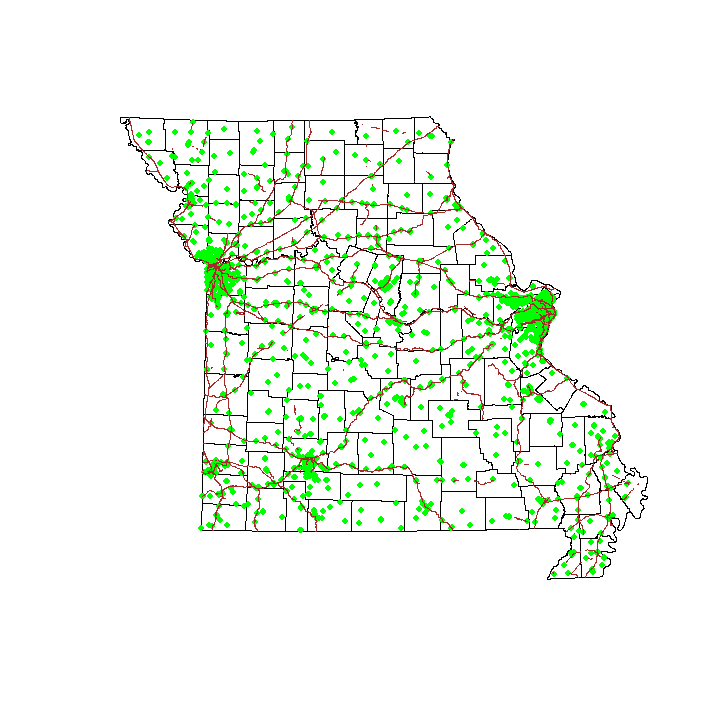

In [13]:
plot(counties, col = "white", lwd = 0.2)
plot(publicSchool, col = "green", add = TRUE, pch = 20, lwd = 0.2)
plot(railLine, col = "brown", add = TRUE)

## Spatial Sampling Strategies

Now that the data has been imported and examined, let's experiment with different methods for sampling from a set of geospatial features. 

### Random Sampling 

Random sampling involves selecting features from a set without any systematic influence. To do this, the standard R sample() function can be applied. This function requires the number of samples n to be drawn from a set of alternatives N. In this case, the set of alternatives is just a set of numbers less than or equal to the size of the input featureclass.

#### Point features

Randomly select 50 public schools within the state.

In [14]:
# Specify sample size
n <- 50

#get number of school features in dataset
N <- length(publicSchool)

In [15]:
N

[1] 2343

In [16]:
sample(10, 5) # out of 10, draw 5 randomly

[1]  4 10  2  5  8

In [17]:
# Draw samples randomly
randomIndices <- sample(N, n)

samp.rand <- publicSchool[randomIndices,]

dim(samp.rand@data)

[1] 50 23

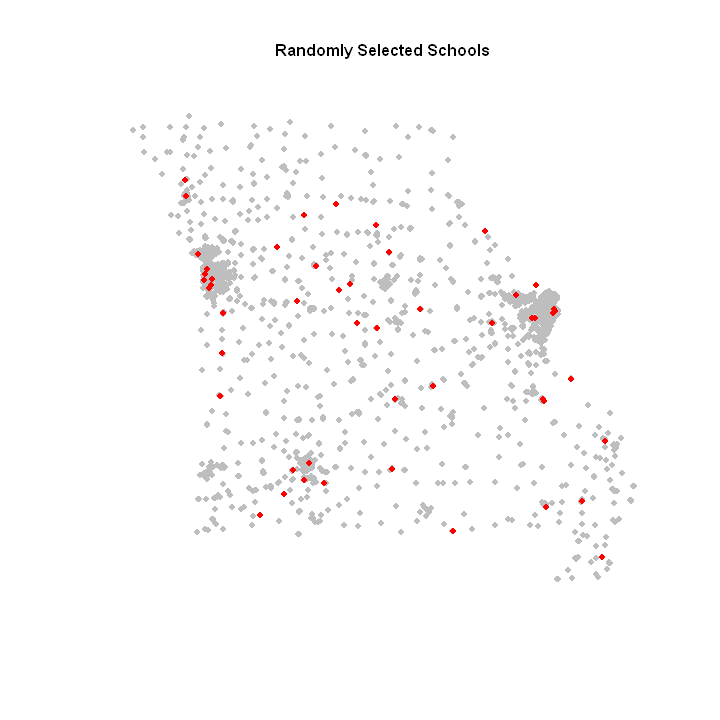

In [18]:
#Draw the sampled region and the selected points
plot(publicSchool, pch = 20, col = "gray", 
     main = "Randomly Selected Schools", cex.main = 0.8)

plot(samp.rand, col = "red", pch = 20, add = TRUE)

#### Line features

Similarly, randomly sample from a set of line features - in this case, select 100 rail line features within the state.

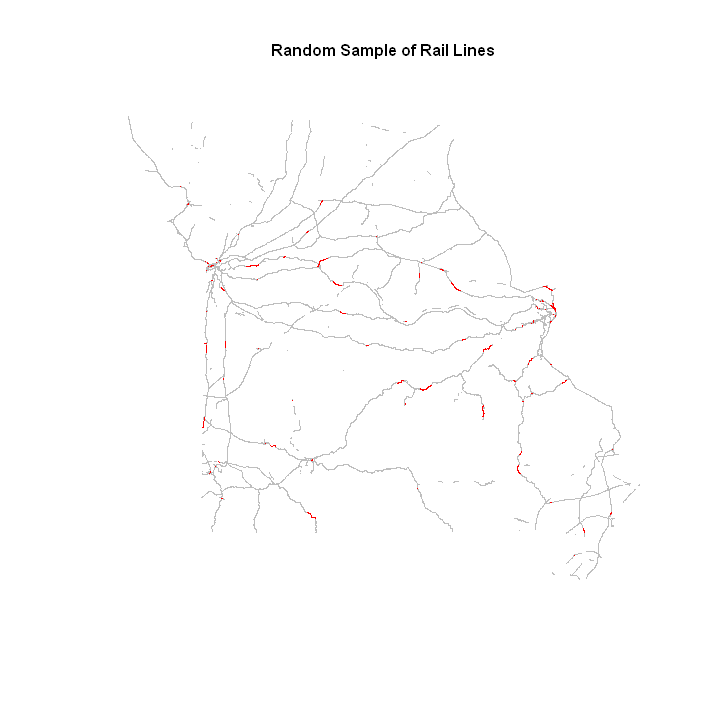

In [19]:
# Specify sample size
n <- 100

#get number of rail line features in dataset
N <- length(railLine)

# Draw samples randomly
samp.rand <- railLine[sample(N,n),]

#Draw the sampled region and the selected lines
plot(railLine,col="gray",main="Random Sample of Rail Lines",cex.main=.8)
plot(samp.rand,col="red",add=TRUE)

#### Polygon features

Randomly select from a set of polygon features - in this example, select 30 counties within the state.

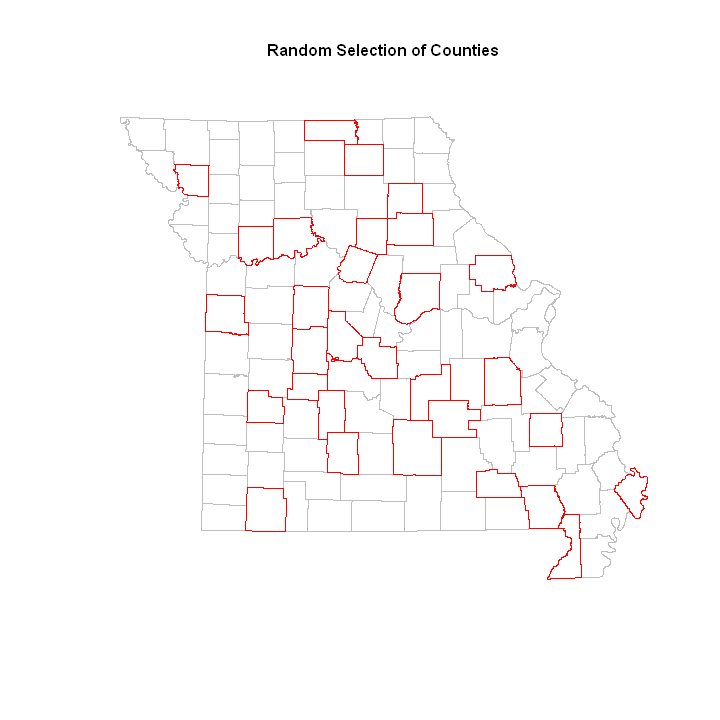

In [20]:
# Specify sample size
n <- 30

#get number of counties in dataset
N <- length(counties)

# Draw samples randomly
samp.rand <- counties[sample(N,n),]

#Draw the sampled region and the selected polygons
plot(counties,border="gray",main="Random Selection of Counties",cex.main=.8)
plot(samp.rand,border="red",add=TRUE)

## Biasing Sampling Representation

What if one wanted to skew the representation of certain groups of observations in the sample? Who on Earth would want to do this?  As an example, one might wish to have longer rail segments to be more prevalent in a sample of the railways.  To place more sampling emphasis on a feature of a certain type, the "prob" argument of the sample() function can be supplied such that each observation is assigned a probabililty value representing its chance of selection. The probability values should be supplied as a vector and the values should be non-negative. 

### Manipulation based on length

In the example below, the 'length' attribute reflects the length of each rail segment. The rail segments are first sampled such that longer segments have a higher probability of being sampled. The probabilities are computed as the length of a segment divided by the longest segment in the dataset.   Then, the rail segments are sampled such that shorter segments have a higher probability of being sampled.

In [21]:
peek_railLine

,LINEARID,FULLNAME,MTFCC,length
0,11051005878,at and Sf Rlwy,R1011,679.924
1,11051005879,at and Sf Rlwy,R1011,426.020
2,11051005880,at and Sf Rlwy,R1011,3208.210


In [22]:
# Specify sample size
n <- 100

#get number of rail line features in dataset
N <- length(railLine)

# Assign higher probability to longer lines
pr1 <- c(railLine$length)/max(railLine$length)

In [23]:
railLine$length[1:20]

[1]  679.924  426.020 3208.210 6140.460 7084.430  680.197 3037.610 6728.010
 [9]  443.037  234.982  970.865 1063.640 1962.110  382.913 2100.440 1234.390
[17] 1155.610  115.825  607.558  603.957

In [24]:
pr1[1:20]

[1] 0.011768889 0.007374033 0.055531304 0.106285981 0.122625275 0.011773614
 [7] 0.052578367 0.116455957 0.007668582 0.004067332 0.016804822 0.018410676
[13] 0.033962405 0.006627888 0.036356776 0.021366209 0.020002596 0.002004829
[19] 0.010516297 0.010453966

In [25]:
max(railLine$length)

[1] 57773

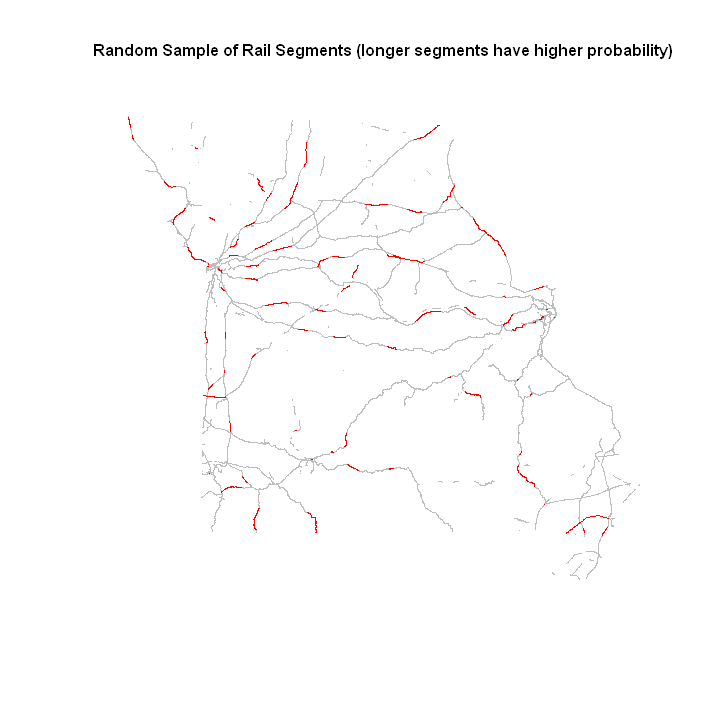

In [26]:
# Draw samples randomly
samp.rand <- railLine[sample(N, n, replace = TRUE, prob = pr1),]

#Draw the sampled region and the selected lines
plot(railLine, col = "gray", 
     main = "Random Sample of Rail Segments (longer segments have higher probability)", 
     cex.main = 0.8)

plot(samp.rand, col = "red", add = TRUE)

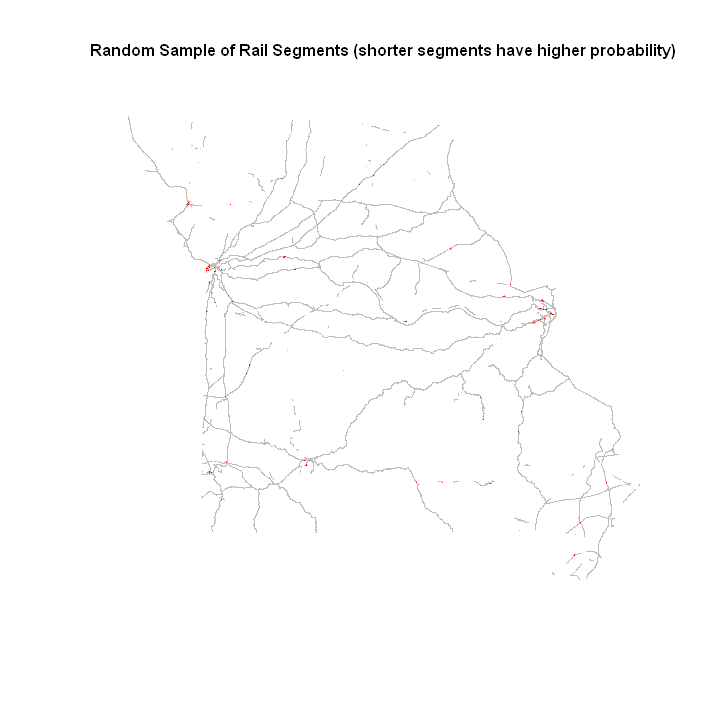

In [27]:
# Assign higher probability to shorter lines
pr2 <- c(1/railLine$length)

# Draw samples randomly
samp.rand <- railLine[sample(N, n, replace = TRUE, prob = pr2),]

#Draw the sampled region and the selected lines
plot(railLine, col = "gray", 
         main="Random Sample of Rail Segments (shorter segments have higher probability)", 
         cex.main = 0.8)

plot(samp.rand, col = "red", add = TRUE)

### Manipulation based on population

In the case of the polygon county features, a population field (i.e. POP90) could be used to assign a probability of selection to features. First, let's visualize the 1990 population distribution in the state.

In [29]:
counties$POP90 <- as.numeric(as.character(counties$POP90))

In [31]:
#plot the 1990 population of each county
numcat <- 5

q <- classIntervals(counties$POP90, numcat, style = "kmeans")

pal <- brewer.pal(numcat, "Reds")

cols <- findColours(q, pal)

In [32]:
q

style: kmeans
  one of 6,672,876 possible partitions of this variable into 5 classes
     [2440,26359.5)   [26359.5,72205.5)  [72205.5,189664.5) [189664.5,514958.5) 
                 80                  24                   6                   3 
  [514958.5,993529] 
                  2 

In [33]:
pal

[1] "#FEE5D9" "#FCAE91" "#FB6A4A" "#DE2D26" "#A50F15"

In [34]:
cols[1:20]

[1] "#FEE5D9" "#FEE5D9" "#FEE5D9" "#FEE5D9" "#FEE5D9" "#FEE5D9" "#FEE5D9"
 [8] "#FEE5D9" "#FEE5D9" "#FEE5D9" "#FEE5D9" "#FEE5D9" "#FEE5D9" "#FEE5D9"
[15] "#FEE5D9" "#FEE5D9" "#FEE5D9" "#FEE5D9" "#FEE5D9" "#FEE5D9"

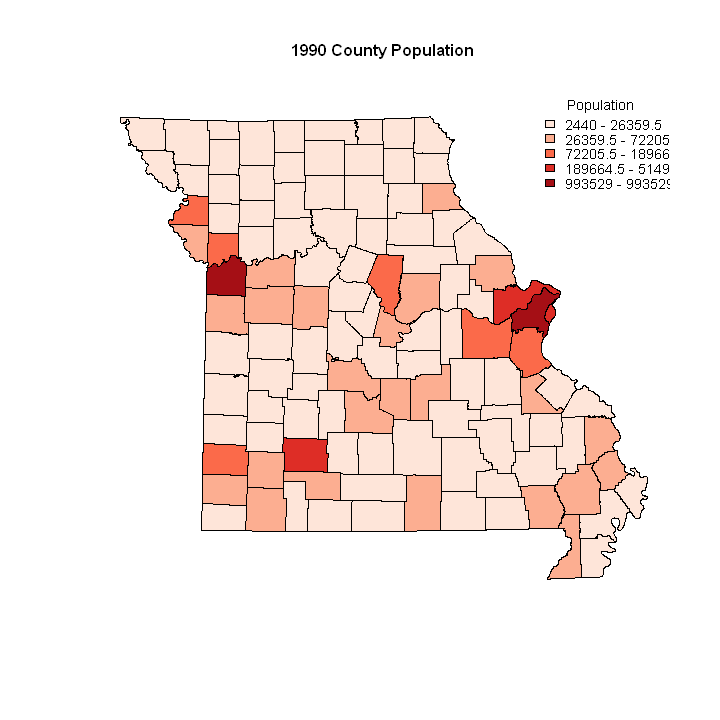

In [35]:
plot(counties, col = cols, lwd = 0.2, 
         main = "1990 County Population", cex.main = 0.8)

brks <- round(q$brks,3)

leg <- paste(brks[-numcat], brks[-1], sep = " - ")

legend("topright", fill = pal, legend = leg, 
           bty = "n", 
           title = "Population", 
           cex = 0.7)

Next, assign a higher probability of being sampled to counties with greater population. This is done by dividing population of each county by the maximum county population within the state (using the max() function).

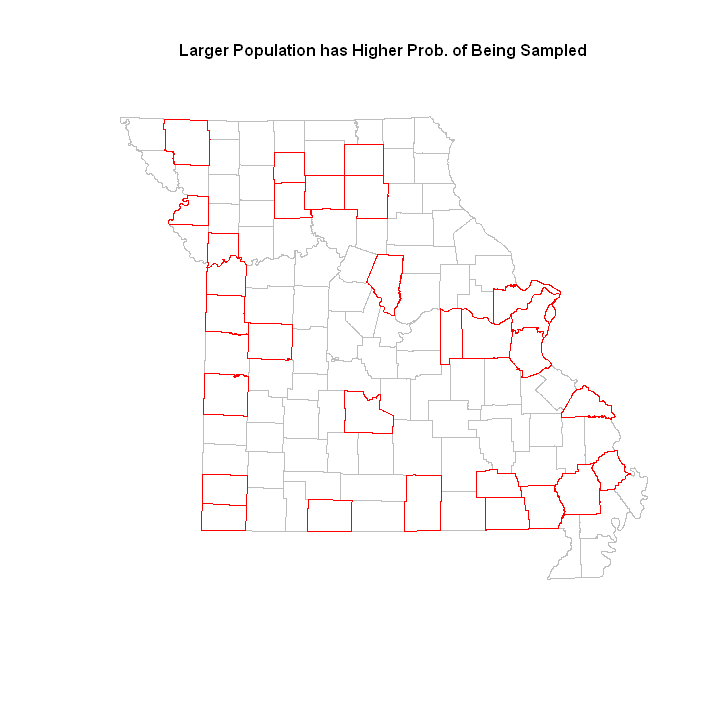

In [36]:
# Specify sample size
n <- 30

#get number of counties in dataset
N <- length(counties)

# Assign higher probability to populated counties
pr1 <- c(counties$POP90)/max (counties$POP90)

# Draw samples randomly
samp.rand <- counties[sample(N, n, prob = pr1),]

#Draw the sampled region and the selected polygons
plot(counties, border = "gray", 
             main = "Larger Population has Higher Prob. of Being Sampled", 
             cex.main = 0.8)
 
plot(samp.rand, border = "red", add = TRUE)

Now, assign higher probability of being sampled to counties with less population. This can be done by taking the inverse of population for each county.

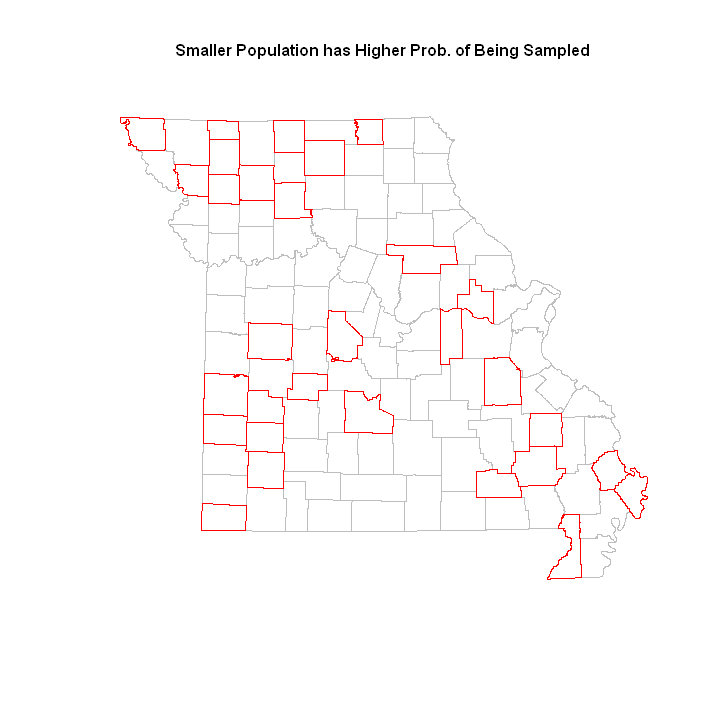

In [37]:
# Specify sample size
n <- 30

#get number of counties in dataset
N <- length(counties)

# Assign lower probability to populated counties
pr2 <- c(1/counties$POP90)

# Draw samples randomly
samp.rand <- counties[sample(N, n, prob = pr2),]

#Draw the sampled region and the selected polygons
plot(counties, border = "gray", 
             main = "Smaller Population has Higher Prob. of Being Sampled", 
             cex.main = 0.8)

plot(samp.rand, border = "red", add = TRUE)

### Stratified Sampling

Note how the selected polygons are randomly distributed throughout the county in the previous output. If we wanted the samples to be randomly drawn from sectors of the state, a stratified approach may be warranted. In stratified sampling, the region is first divided into a set of strata (subareas) and then random samples are drawn from each of those subareas. spsample() is only configured to return a single random point from within each strata and the strata are defined based on a regular grid. Thus, in order to select a polygon within each strata, one approach is to apply spsample() and intersect the points returned with the polygon layer to obtain the sampled polygons.   

Therefore, some problems could arise with this hack. For example, what if a polygon were to appear in two or more strata given the strata are simply defined by a regular grid and not the polygon boundaries? A better way would be to define strata based on some polygon attribute and then sample from within those polygon strata. 

In [38]:
peek_counties

,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,MTFCC10,CSAFP10,...,HISP00,POP10,WHITE10,BLACK10,ASIAN10,AMIND10,HAWNPI10,OTHER10,MULTRA10,HISP10
0,29,045,00758477,29045,Clark,Clark County,06,H1,G4020,NA,...,52,7139,7011,19,23,9,0,5,72,42
1,29,005,00758457,29005,Atchison,Atchison County,06,H1,G4020,NA,...,43,5685,5600,17,9,10,3,5,41,55
2,29,199,00758552,29199,Scotland,Scotland County,06,H1,G4020,NA,...,42,4843,4776,3,11,12,0,18,23,33


In [39]:
# draw stratified sample
samp.reg <- spsample(counties, 
                         type = "stratified", 
                         cellsize = 100000)

summary(samp.reg)

Object of class SpatialPoints
Coordinates:
         min       max
x1  362893.3  834940.3
x2 4078625.7 4476072.7
Is projected: TRUE 
proj4string :
[+proj=utm +zone=15 +datum=NAD83 +units=m +no_defs +ellps=GRS80
+towgs84=0,0,0]
Number of points: 19

In [40]:
#Identify features that INTERSECT the sampled feature
selFeat <- overGeomGeom(samp.reg, counties, 
                            returnList = TRUE, 
                            fn = NULL)

In [41]:
#Select the intersecting features from the featureclass
intSet <- unlist(selFeat)
intFeat <- counties[intSet, ]

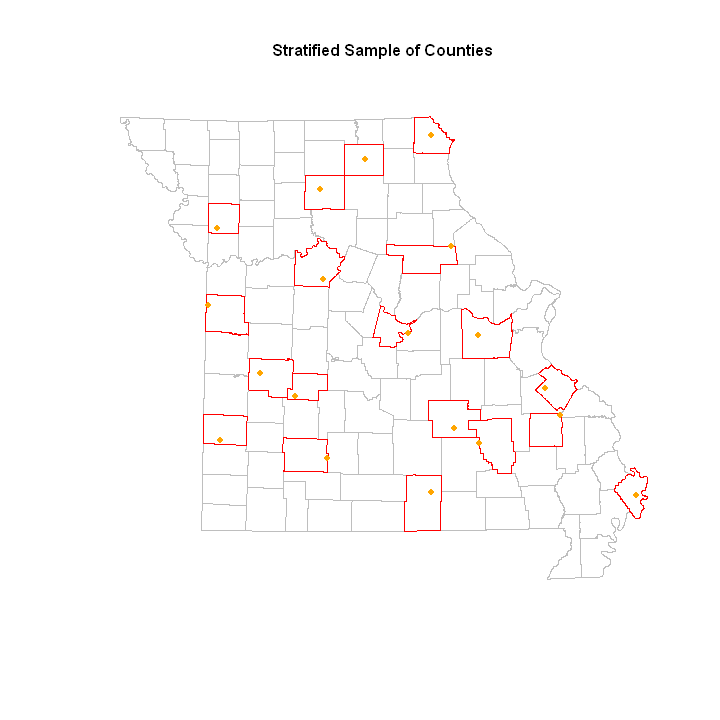

In [42]:
# Draw the sampling area and sampled locations
plot(counties, border = "gray", 
             main = "Stratified Sample of Counties", 
             cex.main = 0.8)

plot(intFeat, border = "red", add = TRUE)

points(samp.reg, pch = 20, col = "orange")